In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline 

Text(79.8677,0.5,'Reaction')

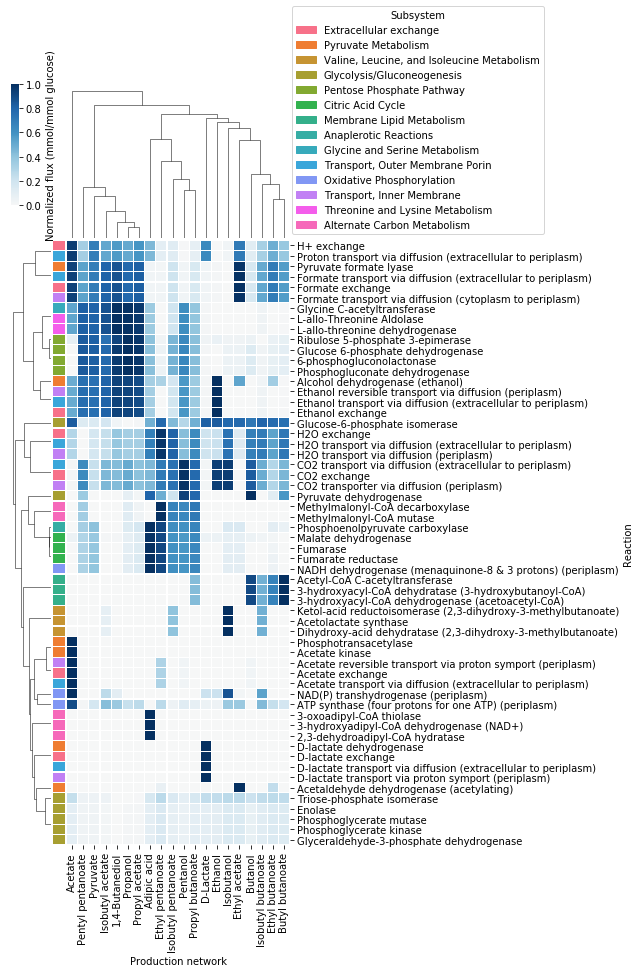

In [30]:
figsize = (5,14)

df = pd.read_csv('fluxes.csv')
df3 = df.set_index('id')

# Categorical coloring
lut = dict(zip(df['subsystem'].unique(),sns.color_palette("husl", len(df['subsystem'].unique()))))
id_to_col = dict(zip(df3.index, df3['subsystem'].map(lut)))
row_colors = [id_to_col[id] for id in list(df3.index)]
df3.drop('subsystem','columns',inplace=True)

g = sns.clustermap(df3, cmap="RdBu",row_colors=row_colors, center=0, vmin=df3.values.min(), vmax=df3.values.max(), linewidths=.15, figsize=figsize,cbar_kws={"label": "Normalized flux (mmol/mmol glucose)"})

# categorical row legend
legend_TN = [mpatches.Patch(color=c, label=l) for l, c in lut.items()]
l2=g.ax_heatmap.legend(loc=(0,20),bbox_to_anchor=(1.01,1.01),handles=legend_TN,frameon=True)
l2.set_title(title='Subsystem',prop={'size':10})

#axis labels
ax = g.ax_heatmap
ax.set_xlabel('Production network')
ax.set_ylabel('Reaction')
